# Linear Regression - part 2

## Seoul Artificial Intelligence Meetup

Martin Kersner, <m.kersner@gmail.com>

2017/11/11

In [1]:
import numpy as np
from sklearn.metrics import r2_score
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

%matplotlib inline

## Simple dataset

In [2]:
X = np.matrix([[1, 2, 3, 4, 5]]).T
y = np.matrix([[0, 3, 2, 4.5, 8]]).T

# If features were not standardized, we have to add ones as a first column to data matrix
X = np.c_[np.ones(X.shape[0]), X]

## Locally weighted linear regression

Linear regression usually underfits the data.


### Fit
$\hat{\beta} = (X^{T}WX)^{-1}X^{T}Wy$

$W$ is matrix (kernel) for weighing data points

**Gaussian kernel**

$w(i,i) = exp(\frac{|x^{i}-x|}{-2k^2})$

### Predict

### Assumption
m > n

In [104]:
# Inspired by book Machine Learning in Action, Peter Harrington
def gaussian(X, k=1.0):
    return np.asscalar(np.exp(X*X.T / (-2.0*k**2)))

def create_kernel(X, X_i, kernel="gaussian", k=1.0):
    """Apply `kernel` as a distance function between given data point `X_i`
    and data matrix `X` containing all data points.
    
    Args
    X    data matrix
    X_i  data point
    """
    def apply_kernel(X_j):
        diff_mat = X_j - X_i
        return eval(kernel)(diff_mat, k)
    
    w = np.apply_along_axis(apply_kernel, axis=1, arr=X)

    return np.diag(w)

### Importance of neighboring data points

In [84]:
def apply_and_plot_gaussian_kernel(X, k=1.0):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    colors = ["red", "green", "blue", "black", "magenta"]

    for row_idx, color in zip(range(0,X.shape[0],int(X.shape[0]/len(colors))), colors):
        W = create_kernel(X, X[row_idx,:], k=k)
        p = [W[i,i]  for i in range(W.shape[0])]
        ax.plot(p,  marker='o', linestyle='-', color=color)

    plt.legend()

In [68]:
X_example = np.transpose(np.matrix(list(range(-50,50,1)))/5)

### k=1.0

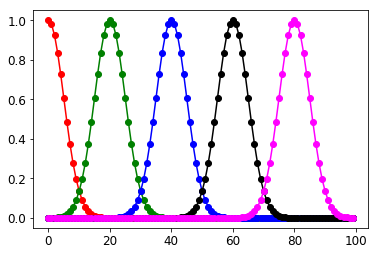

In [102]:
apply_and_plot_gaussian_kernel(X_example, k=1.0)

### k=0.5

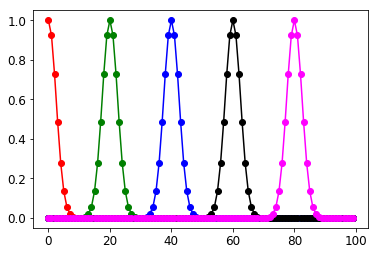

In [86]:
apply_and_plot_gaussian_kernel(X_example, k=0.5)

### k=0.1

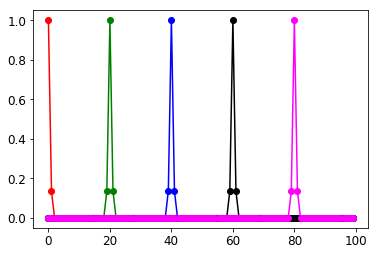

In [87]:
apply_and_plot_gaussian_kernel(X_example, k=0.1)

In [4]:
# Inspired by book Machine Learning in Action, Peter Harrington
def lwlr(X, y, X_i):
    """Compute Locally Weighted Linear Regression. 
    
    Args
    X    data matrix
    y    labels
    X_i  data point
    """
    W = create_kernel(X, X_i)

    WtWX = X.T * W * X
    
    # matrix must be non-singular
    assert(np.linalg.det(WtWX) != 0.0)
    
    W_hat = WtWX.I * X.T * W * y
    
    return X_i * W_hat

def test_lwlr(X, y, X_test):
    """
    Predict
    X       data matrix
    y       labels
    X_test  test data matrix 
    """
    def lwlr_apply(X_row):
        return np.asscalar(lwlr(X, y, X_row))
        
    y_hat = np.apply_along_axis(lwlr_apply, axis=1, arr=X_test)
    
    return np.array(y_hat)

In [5]:
y_hat = test_lwlr(X, y, X)

### Display line fitted with Locally Weighted Linear Regression

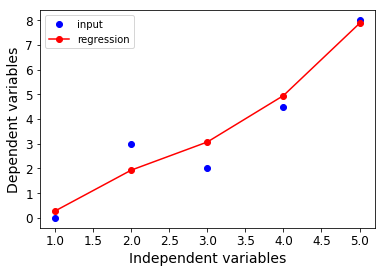

In [6]:
srt_idx = X[:, 1].argsort(0)
x_sort  = X[srt_idx][:, 0, :]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X[:,1], y,  marker='o', linestyle='', color='b', label="input")
ax.plot(x_sort[:, 1], y_hat[srt_idx],  marker='o', linestyle='-', color='r', label="regression")
plt.ylabel('Dependent variables')
plt.xlabel('Independent variables')
plt.legend()

## Evaluation

### Correlation

In [7]:
np.corrcoef(np.transpose(y), np.transpose(y_hat))

array([[ 1.       ,  0.9645694],
       [ 0.9645694,  1.       ]])

In [8]:
r2_score(y, y_hat)

0.92820941931747236